<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/FourierTransform/2021_01_12_Mar1415_7pm4am_FourierTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimal way to include longer time
* Auto encoders
* Fourier transform
* Scipy fft
* One pixel for air conditioner

# JPG images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import imageio as iio
import matplotlib.pyplot as plt

* Pictures are taken by every 10 seconds 
* All pictures in one day (24 hr) = 8,640

In [3]:
# -- get file list (this may take some time)

import os
import glob

srch14 = os.path.join("drive", "My Drive", "urban_heat", "data", "singapore_ir", 
                    "03-14", "*.jpeg")
flist14 = sorted(glob.glob(srch14))

print("2020 March 14 data - number of files is {0}".format(len(flist14)))

srch15 = os.path.join("drive", "My Drive", "urban_heat", "data", "singapore_ir", 
                    "03-15", "*.jpeg")
flist15 = sorted(glob.glob(srch15))

print("2020 March 15 data - number of files is {0}".format(len(flist15)))

2020 March 14 data - number of files is 8608
2020 March 15 data - number of files is 8607


In [4]:
# -- get the paths and image times

# -- set file name
fname14 = os.path.join("drive", "My Drive", "urban_heat", "output", "paths_times_0314.csv")

# -- check that the file exists, create if it does not
if os.path.isfile(fname14):
  flist_df14 = pd.read_csv(fname14)
else:

  # -- get file list (this may take some time)
  srch14 = os.path.join("drive", "My Drive", "urban_heat", "data", "singapore_ir", 
                      "03-14", "*.jpeg")
  flist14 = sorted(glob.glob(srch14))

  print("number of files is {0}".format(len(flist14)))

  # -- get array of times
  times = []
  for ii in range(len(flist14)):
    stmp = os.path.split(flist14[ii])[1][5:-8]

    yr = stmp[:4]
    mo = stmp[5:7]
    dy = stmp[8:10]
    hr = stmp[11:13]
    mn = stmp[14:16]
    sc = stmp[17:19]

    times.append(pd.to_datetime("{0}-{1}-{2} {3}:{4}:{5}".format(yr, mo, dy, hr, mn, sc)))

  # -- convert to array
  times14 = np.array(times)

  # -- put into DataFrame
  flist_df14 = pd.DataFrame()
  flist_df14["path"] = flist14
  flist_df14["time"] = times14

  # -- write DataFrame to file
  flist_df14.to_csv(fname14, index=False)

In [5]:
flist_df14

,path,time
0,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:03
1,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:13
2,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:23
3,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:33
4,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:43
...,...,...
8603,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 23:59:12
8604,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 23:59:22
8605,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 23:59:32
8606,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 23:59:42


In [6]:
# -- get the paths and image times

# -- set file name
fname15 = os.path.join("drive", "My Drive", "urban_heat", "output", "paths_times_0315.csv")

# -- check that the file exists, create if it does not
if os.path.isfile(fname15):
  flist_df15 = pd.read_csv(fname15)
else:

  # -- get file list (this may take some time)
  srch15 = os.path.join("drive", "My Drive", "urban_heat", "data", "singapore_ir", 
                      "03-15", "*.jpeg")
  flist15 = sorted(glob.glob(srch15))

  print("number of files is {0}".format(len(flist15)))

  # -- get array of times
  times = []
  for ii in range(len(flist15)):
    stmp = os.path.split(flist15[ii])[1][5:-8]

    yr = stmp[:4]
    mo = stmp[5:7]
    dy = stmp[8:10]
    hr = stmp[11:13]
    mn = stmp[14:16]
    sc = stmp[17:19]

    times.append(pd.to_datetime("{0}-{1}-{2} {3}:{4}:{5}".format(yr, mo, dy, hr, mn, sc)))

  # -- convert to array
  times15 = np.array(times)

  # -- put into DataFrame
  flist_df15 = pd.DataFrame()
  flist_df15["path"] = flist15
  flist_df15["time"] = times15

  # -- write DataFrame to file
  flist_df15.to_csv(fname15, index=False)

In [7]:
flist_df15

,path,time
0,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:02
1,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:12
2,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:22
3,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:32
4,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:42
...,...,...
8602,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:11
8603,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:21
8604,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:31
8605,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:41


In [8]:
flist_df1415 = pd.concat([flist_df14, flist_df15])
flist_df1415

,path,time
0,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:03
1,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:13
2,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:23
3,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:33
4,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:43
...,...,...
8602,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:11
8603,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:21
8604,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:31
8605,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:41


In [9]:
# -- set the file names
#pname = "/content/drive/My Drive/urban_heat/output/paths_times_0314-15.csv"
#fpaths = pd.read_csv(pname)
#fpaths = fpaths[(flist_df1415["time"] >= "2020-03-14 19:00:00") & (flist_df1415["time"]< "2020-03-15 04:00:00")]
ind = (flist_df1415["time"] >= "2020-03-14 19:00:00") & (flist_df1415["time"]< "2020-03-15 04:00:00")
fpaths = flist_df1415[ind]
fpaths = fpaths.path.values

print("there are {0} files on 03/15/20" \
      .format(len(fpaths)))

# Increase number of images from 100 to 300
# -- only take the first 300 images
#fpaths = fpaths[:300]

# -- read in the 0th image to get the image shape
img0 = np.asarray(iio.imread(fpaths[0]))[:, :, 0] / 255.
nrow, ncol = img0.shape


# -- initialize an array to hold all of the images
imgs = np.zeros((len(fpaths), nrow, ncol))


# -- read in the images
for ii, fname in enumerate(fpaths):
  if ii % 20 == 0:
    print("working on the {0} image".format(ii))

  imgs[ii, :, :] = np.asarray(iio.imread(fname))[:, :, 0] / 255.

there are 3228 files on 03/15/20
working on the 0 image
working on the 20 image
working on the 40 image
working on the 60 image
working on the 80 image
working on the 100 image
working on the 120 image
working on the 140 image
working on the 160 image
working on the 180 image
working on the 200 image
working on the 220 image
working on the 240 image
working on the 260 image
working on the 280 image
working on the 300 image
working on the 320 image
working on the 340 image
working on the 360 image
working on the 380 image
working on the 400 image
working on the 420 image
working on the 440 image
working on the 460 image
working on the 480 image
working on the 500 image
working on the 520 image
working on the 540 image
working on the 560 image
working on the 580 image
working on the 600 image
working on the 620 image
working on the 640 image
working on the 660 image
working on the 680 image
working on the 700 image
working on the 720 image
working on the 740 image
working on the 760 imag

In [10]:
imgs[ii, :, :].shape

(240, 320)

# Label pixels

In [11]:
# Increase labeld pixels 

# building is increased from 100 pixels to 150 pixels (1.5 times)
# window are increased from 30 pixels to 150 pixels (5 times)
# air conditioner and sky are 30 pixels as usual

# -- read in the labeled pixels 
acs = np.load("/content/drive/My Drive/urban_heat/output/acs_pix.npy")
bld = np.load("/content/drive/My Drive/urban_heat/output/bld_pix_150.npy")
sky = np.load("/content/drive/My Drive/urban_heat/output/sky_pix_20201112.npy")
win = np.load("/content/drive/My Drive/urban_heat/output/win_pix_150.npy")

# -- convert to pixel numbers
acs_col, acs_row = acs.round().astype(int).T
bld_col, bld_row = bld.round().astype(int).T
sky_col, sky_row = sky.round().astype(int).T
win_col, win_row = win.round().astype(int).T

# -- extract features from images
feat_acs = imgs[:, acs_row, acs_col].T
feat_bld = imgs[:, bld_row, bld_col].T
feat_sky = imgs[:, sky_row, sky_col].T
feat_win = imgs[:, win_row, win_col].T

# -- determine the shape of these images so that we know how to set up the convnet
acs_sh = acs.shape
bld_sh = bld.shape
sky_sh = sky.shape
win_sh = win.shape
acs_sh, bld_sh, sky_sh, win_sh

((30, 2), (150, 2), (30, 2), (150, 2))

In [12]:
#print(sky)
#print(sky_row)
#print(sky_col)
#len(sky_row), len(sky_col)

In [13]:
# -- extract features from images
#feat_acs = imgs[:, acs_row, acs_col].T
#feat_bld = imgs[:, bld_row, bld_col].T
#feat_sky = imgs[:, sky_row, sky_col].T
#feat_win = imgs[:, win_row, win_col].T

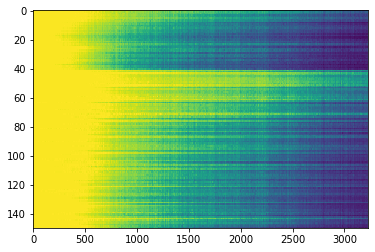

In [14]:
plt.imshow(feat_bld, aspect="auto", interpolation="nearest")

Text(0.5, 1.0, 'Air conditioner (7pm-4am, March 14-15, 2020)')

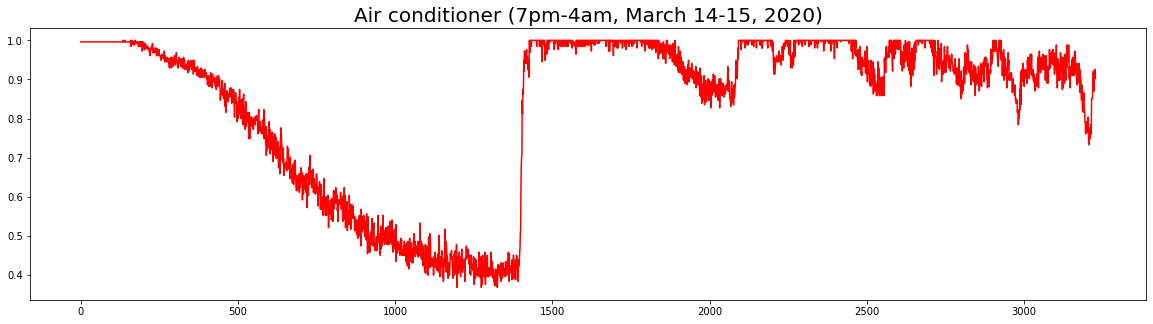

In [73]:
# Plot of air conditioner 
plt.figure(figsize=(20,5))
plt.plot(imgs[:, 99, 90], color="red")
plt.title("Air conditioner (7pm-4am, March 14-15, 2020)", fontsize=20)

In [16]:
2000 / 360

5.555555555555555

In [17]:
4000/360

11.11111111111111

In [18]:
7000 / 360

19.444444444444443

In [19]:
8000 / 360

22.22222222222222

Text(0.5, 1.0, 'Air conditioner (7pm-4am, March 14-15, 2020)')

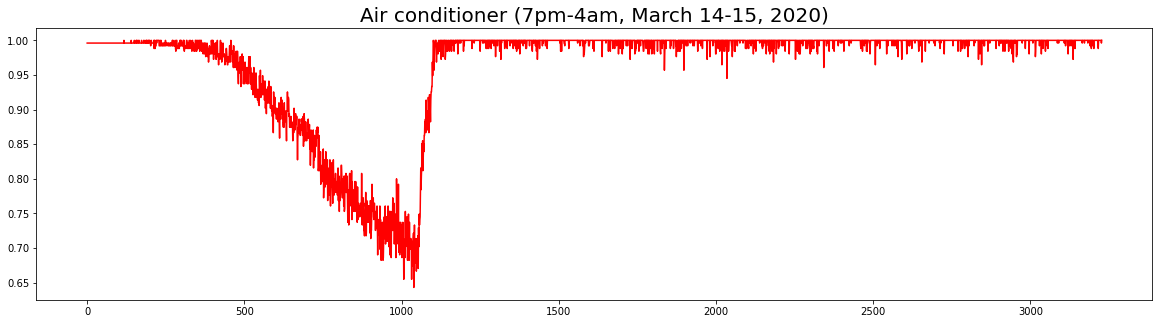

In [74]:
# Plot of air conditioner 
plt.figure(figsize=(20,5))
plt.plot(imgs[:, 200, 125], color="red")
plt.title("Air conditioner (7pm-4am, March 14-15, 2020)", fontsize=20)

In [21]:
#plt.figure(figsize=(20,5))
#plt.plot(feat_acs[3,1,1,:], color="red")
#plt.title("Air conditioner (7pm-4am, March 13-15, 2020)", fontsize=20)

Text(0.5, 1.0, 'Sky (7pm-4am, March 14-15, 2020)')

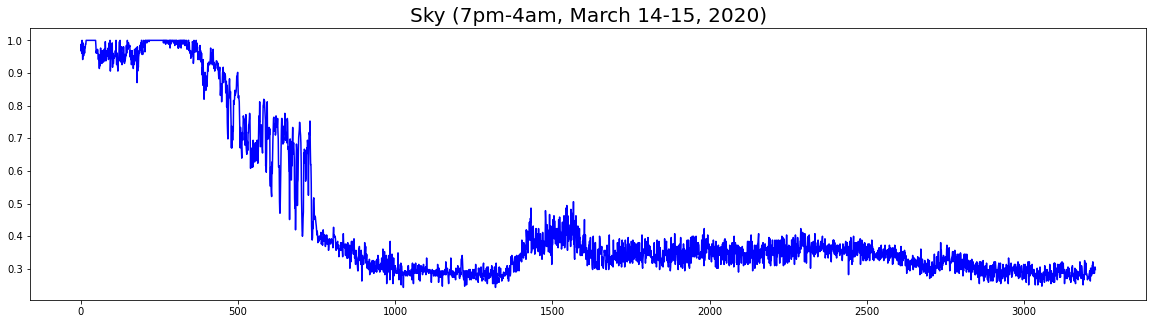

In [75]:
# Plot
plt.figure(figsize=(20,5))
plt.plot(imgs[:, 10, 280], color="blue")
plt.title("Sky (7pm-4am, March 14-15, 2020)", fontsize=20)

In [23]:
4000/360

11.11111111111111

Text(0.5, 1.0, 'Window (7pm-4am, March 14-15, 2020)')

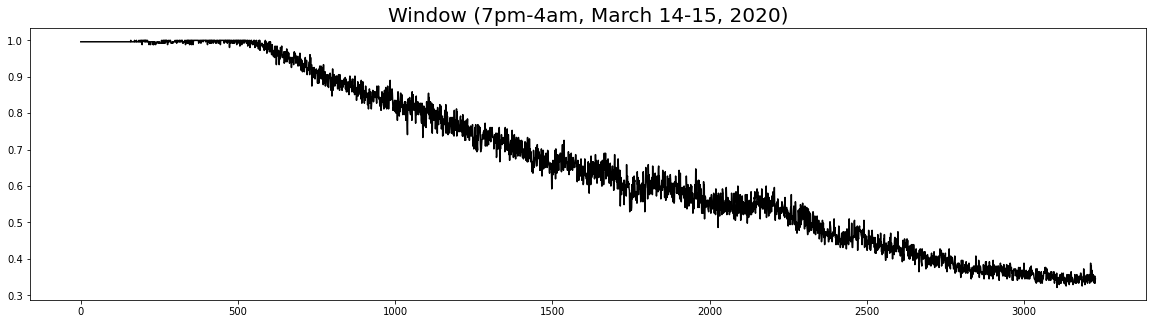

In [76]:
# Plot 
plt.figure(figsize=(20,5))
plt.plot(imgs[:, 140, 200], color="black")
plt.title("Window (7pm-4am, March 14-15, 2020)", fontsize=20)

Text(0.5, 1.0, 'Building (7pm-4am, March 14-15, 2020)')

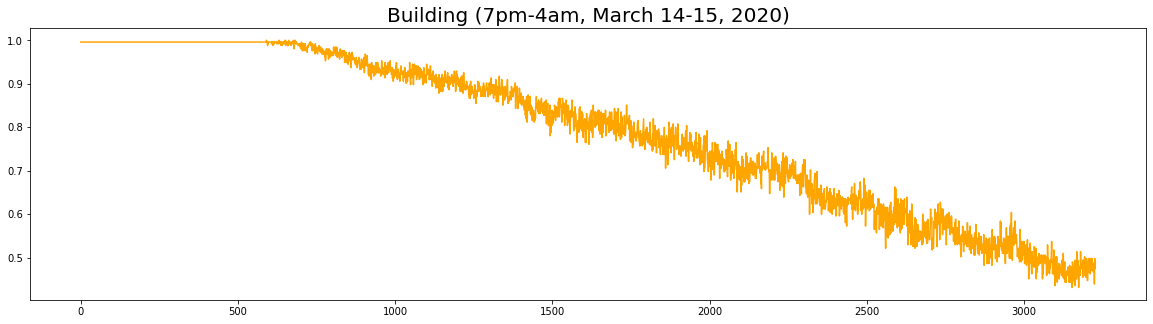

In [77]:
# Plot 
plt.figure(figsize=(20,5))
plt.plot(imgs[:, 100, 175], color="orange")
plt.title("Building (7pm-4am, March 14-15, 2020)", fontsize=20)

In [26]:
600/360 # 9 pm - 4 am

1.6666666666666667

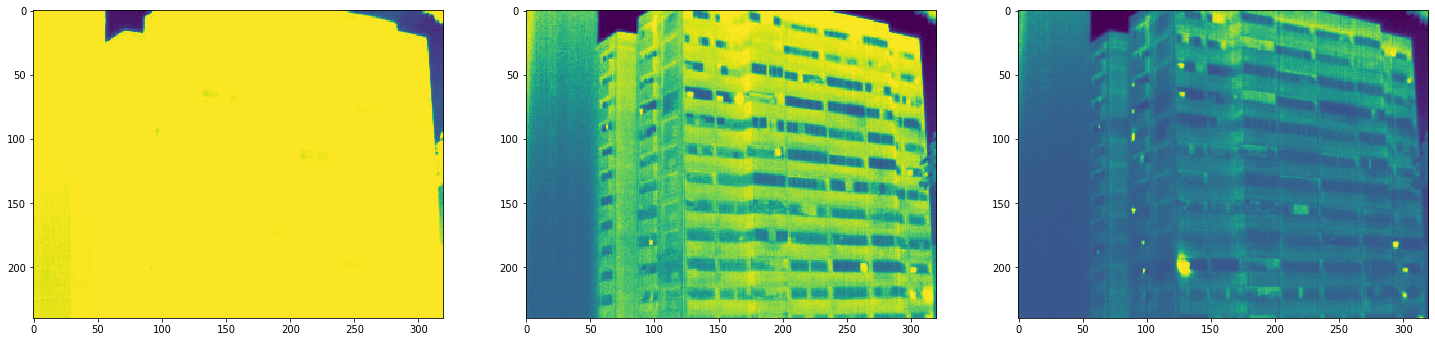

In [27]:
fig, ax = plt.subplots(1, 3, figsize=[25, 8])
ax[0].imshow(imgs[20], interpolation="nearest")
ax[1].imshow(imgs[1000], interpolation="nearest")
ax[2].imshow(imgs[3000], interpolation="nearest")
fig.show()

# Make features

In [28]:
#cube = imgs[:, 99-5:99+6, 90-5:90+6]

In [29]:
#for ii in range(30):
  #print(feat_sky[ii].shape)

In [30]:
# Make features

# Air conditioner

feat_acs = []

for ii in range(len(acs_row)):
  trow = acs_row[ii]
  tcol = acs_col[ii]
  feat_acs.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_acs = np.array(feat_acs)
print(feat_acs.shape)

# Building
feat_bld = []

for ii in range(len(bld_row)):
  trow = bld_row[ii]
  tcol = bld_col[ii]
  feat_bld.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_bld = np.array(feat_bld)
print(feat_bld.shape)

# Sky
feat_sky = []

for ii in range(len(sky_row)):
  trow = sky_row[ii]
  tcol = sky_col[ii]
  feat_sky.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_sky = np.array(feat_sky)
print(feat_sky.shape)

# Window
feat_win = []

for ii in range(len(win_row)):
  trow = win_row[ii]
  tcol = win_col[ii]
  feat_win.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_win = np.array(feat_win)
print(feat_win.shape)

(30, 11, 11, 3228)
(150, 11, 11, 3228)
(30, 11, 11, 3228)
(150, 11, 11, 3228)


In [31]:
# -- determine the shape of these images so that we know how to set up the convnet
#feat_acs_sh = feat_acs.shape
#feat_bld_sh = feat_bld.shape
#feat_sky_sh = feat_sky.shape
#feat_win_sh = feat_win.shape
#feat_acs_sh, feat_bld_sh, feat_sky_sh, feat_win_sh

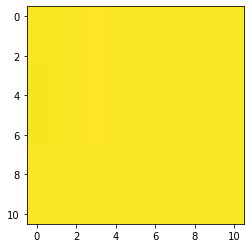

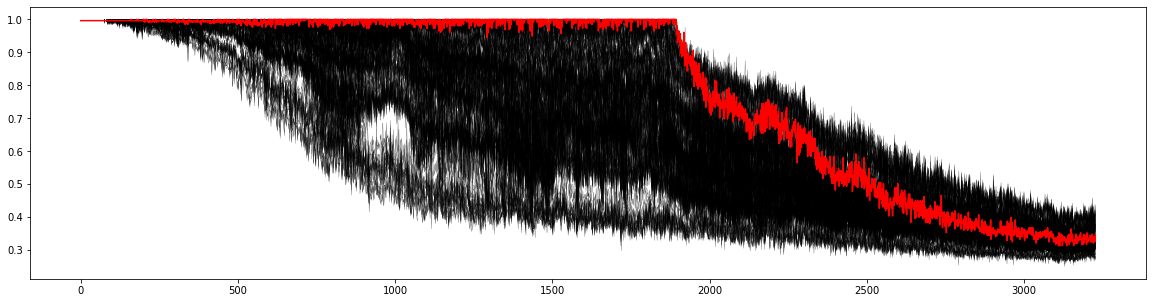

In [32]:
# Plot air conditioner
ind = 10
plt.imshow(feat_acs[ind][:, :, 90], clim=[0, 1])
plt.figure(figsize=(20,5))
dum = plt.plot(feat_acs[ind].reshape(121, 3228).T, "k", lw=0.2)
dum = plt.plot(feat_acs[ind][5, 5], "r")

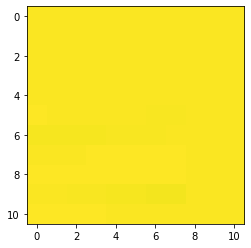

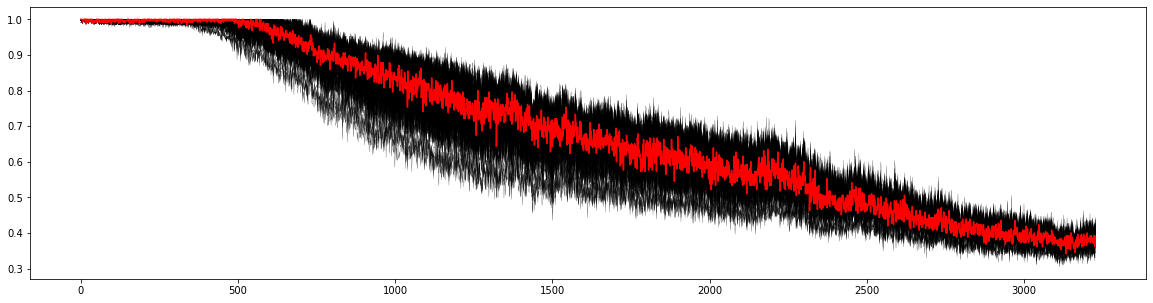

In [33]:
# Plot
ind = 90
plt.imshow(feat_bld[ind][:, :, 90], clim=[0, 1])
plt.figure(figsize=(20,5))
dum = plt.plot(feat_bld[ind].reshape(121, 3228).T, "k", lw=0.2)
dum = plt.plot(feat_bld[ind][5, 5], "r")

In [34]:
# Feature
#feat = np.vstack([feat_acs, feat_bld])
feat = np.vstack([feat_acs, feat_bld, feat_sky, feat_win])
print(feat.shape)
# standardize the features
#feat = (feat - feat.mean(axis=1, keepdims=True)) / feat.std(axis=1, keepdims=True)

(360, 11, 11, 3228)


In [35]:
feat_acs[1,1,1,:]

array([0.99607843, 0.99607843, 0.99607843, ..., 0.39607843, 0.38823529,
       0.36862745])

# Fourier Transformation

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft #scipy is used for fft algorithm which is used for Fourier transform
from scipy.fft import fft, fftfreq

In [37]:
feat_acs.shape

(30, 11, 11, 3228)

In [38]:
feat_acs[1,1,1,:]

array([0.99607843, 0.99607843, 0.99607843, ..., 0.39607843, 0.38823529,
       0.36862745])

In [39]:
x = feat_acs[1,1,1,:]
x.shape

(3228,)

In [40]:
xf = np.fft.fft(x)
xf

array([2215.6       -2.18713936e-14j,   24.49977364-3.75297035e+02j,
        -19.94866832-1.97634203e+02j, ...,   -6.28193184+1.12362660e+02j,
        -19.94866832+1.97634203e+02j,   24.49977364+3.75297035e+02j])

In [41]:
xf.dtype

dtype('complex128')

In [42]:
min(xf), max(xf)

((-19.948668319285492+197.63420314470488j),
 (2215.6000000000004-2.1871393585115584e-14j))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


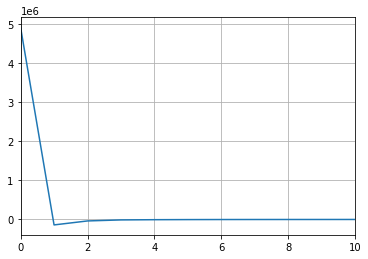

In [43]:
x = feat_acs[1,1,1,:]
xf = np.fft.fft(x)

plt.plot(xf**2)
plt.xlim(0,10)
#plt.ylim(0,100)
plt.grid()
plt.show()

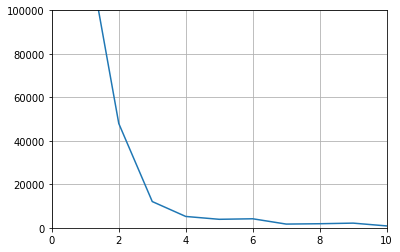

In [44]:
x = feat_acs[2,1,1,:]
xf = np.fft.fft(x)
xf2 = xf.real**2 + xf.imag**2

plt.plot(xf2)
plt.xlim(0,10)
plt.ylim(-10,100000)
plt.grid()
plt.show()

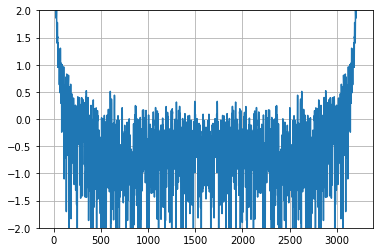

In [45]:
x = feat_acs[3,5,5,:]
xf = np.fft.fft(x)
xf2 = xf.real**2 + xf.imag**2

plt.plot(np.log10(xf2))
#plt.xlim(4,100)
plt.ylim(-2,2)
plt.grid()
plt.show()

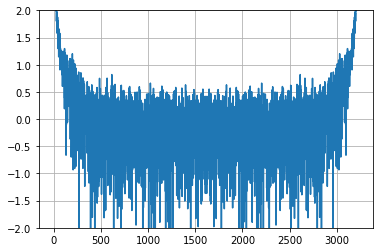

In [46]:
x = feat_bld[2,5,5,:]
xf = np.fft.fft(x)
xf2 = xf.real**2 + xf.imag**2

plt.plot(np.log10(xf2))
#plt.xlim(4,100)
plt.ylim(-2,2)
plt.grid()
plt.show()

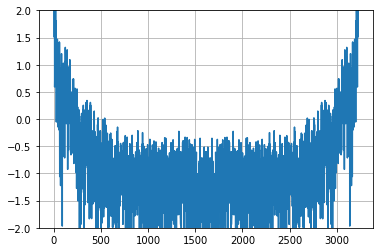

In [47]:
x = feat_sky[2,5,5,:]
xf = np.fft.fft(x)
xf2 = xf.real**2 + xf.imag**2

plt.plot(np.log10(xf2))
#plt.xlim(4,100)
plt.ylim(-2,2)
plt.grid()
plt.show()

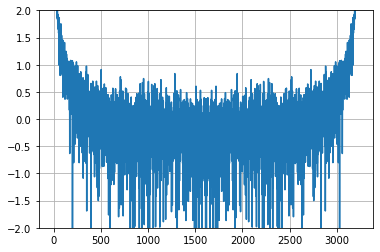

In [48]:
x = feat_win[2,5,5,:]
xf = np.fft.fft(x)
xf2 = xf.real**2 + xf.imag**2

plt.plot(np.log10(xf2))
#plt.xlim(4,100)
plt.ylim(-2,2)
plt.grid()
plt.show()

If 2D Discrete Fourier Transform (2D-DFT) is applied in an image, it transforms image to the frequency. To calculate the Discrete Fourier Transform (DFT), Fast Fourier Transform (FFT) is used. 

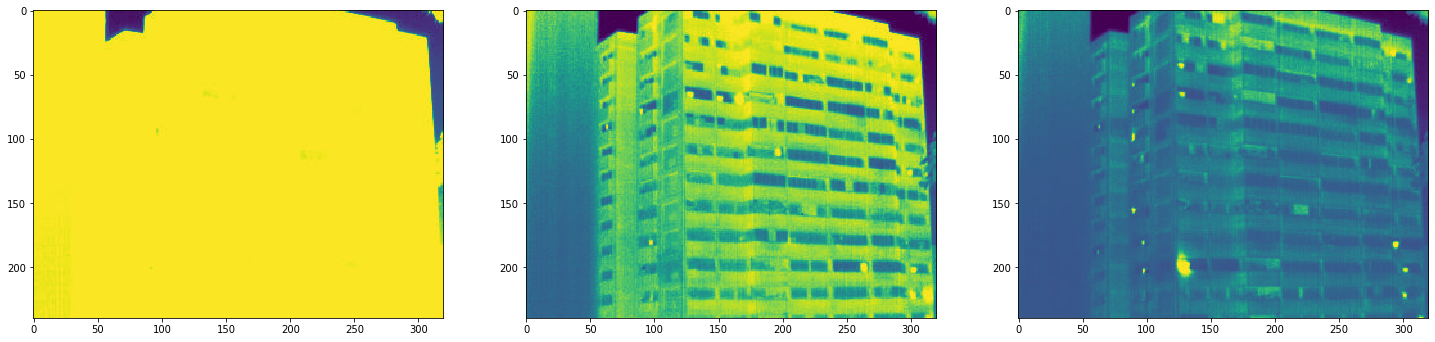

In [49]:
fig, ax = plt.subplots(1, 3, figsize=[25, 8])
ax[0].imshow(imgs[0], interpolation="nearest")
ax[1].imshow(imgs[1000], interpolation="nearest")
ax[2].imshow(imgs[3000], interpolation="nearest")
fig.show()

[Link](https://blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220568857153&parentCategoryNo=&categoryNo=66&viewDate=&isShowPopularPosts=false&from=postView)

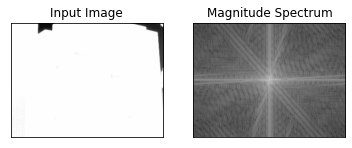

In [50]:
# 2D Discrete Fourier Transform; 2D-DFT using cv2

import cv2

def fourier():
  img = cv2.imread(fpaths[0], cv2.IMREAD_GRAYSCALE)

  f = np.fft.fft2(img) # Calculate 2D DFT of image - Locate Fourier results at the most left
  fshift = np.fft.fftshift(f) # Locate Fourier results at the center and rearrange numbers in order
  m_spectrum = 20*np.log(np.abs(fshift)) # Calculate magnitude spectrum

  plt.subplot(121), plt.imshow(img, cmap='gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(122), plt.imshow(m_spectrum, cmap='gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

  plt.show()

fourier()

The white center on the magnitude spectrum means that this image contains more low-frequency components.

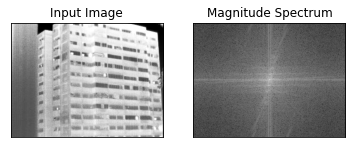

In [51]:
def fourier():
  img = cv2.imread(fpaths[1000], cv2.IMREAD_GRAYSCALE)

  f = np.fft.fft2(img) # Calculate 2D DFT of image - Locate Fourier results at the most left
  fshift = np.fft.fftshift(f) # Locate Fourier results at the center and rearrange numbers in order
  m_spectrum = 20*np.log(np.abs(fshift)) # Calculate magnitude spectrum

  plt.subplot(121), plt.imshow(img, cmap='gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(122), plt.imshow(m_spectrum, cmap='gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

  plt.show()

fourier()

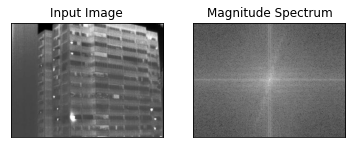

In [52]:
def fourier():
  img = cv2.imread(fpaths[3000], cv2.IMREAD_GRAYSCALE)

  f = np.fft.fft2(img) # Calculate 2D DFT of image - Locate Fourier results at the most left
  fshift = np.fft.fftshift(f) # Locate Fourier results at the center and rearrange numbers in order
  m_spectrum = 20*np.log(np.abs(fshift)) # Calculate magnitude spectrum

  plt.subplot(121), plt.imshow(img, cmap='gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(122), plt.imshow(m_spectrum, cmap='gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

  plt.show()

fourier()

[Link](https://engineer-mole.tistory.com/14#:~:text=%E2%80%8B%20%ED%91%B8%EB%A6%AC%EC%97%90%20%EB%B3%80%ED%99%98%EC%9D%80%20%EB%8B%A4%EC%96%91%ED%95%9C,%EC%9D%98%20%EA%B3%84%EC%82%B0%EC%97%90%20%EC%82%AC%EC%9A%A9%EB%90%9C%EB%8B%A4.)

# Make target

In [ ]:
# Target 
# initialize target array
labs_acs = np.zeros(acs.shape[0])
labs_bld = np.zeros(bld.shape[0]) + 1
labs_sky = np.zeros(sky.shape[0]) + 2
labs_win = np.zeros(win.shape[0]) + 3
#targ = np.hstack([labs_acs, labs_bld])
targ = np.hstack([labs_acs, labs_bld, labs_sky, labs_win])

# Check features and target (Prepare fore the model)

In [ ]:
# -- create a training/testing sample
from sklearn.model_selection import train_test_split
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.20, random_state=314)
print(feat.shape)
print(targ.shape)
print(feat_tr.shape)
print(targ_tr.shape)
print(feat_te.shape)
print(targ_te.shape)

# 3D Convolutional Neural Network (Conv3D)

---



## Set 3D CNN model

In [ ]:
import numpy as np
import keras
from keras.layers import Conv3D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution3D, MaxPooling3D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K

In [66]:
# Conv3D
conv0  = keras.layers.Conv3D(32, kernel_size=(5, 5, 5), padding="same", activation="relu", input_shape=(11,11,300, 1))
pool0  = keras.layers.MaxPooling3D((2, 2, 2), strides=2)
drop0   = keras.layers.Dropout(0.5)

conv1  = keras.layers.Conv3D(64, kernel_size=(5, 5, 5), padding="same", activation="relu")
pool1  = keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=2)
drop1   = keras.layers.Dropout(0.5)

conv2  = keras.layers.Conv3D(64, kernel_size=(5, 5, 5), padding="same", activation="relu")
pool2  = keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=2)
drop2   = keras.layers.Dropout(0.5)

flat   = keras.layers.Flatten()
fconn  = keras.layers.Dense(1024, activation="relu")
drop3   = keras.layers.Dropout(0.5)

#output = keras.layers.Dense(2, activation="softmax")
output = keras.layers.Dense(4, activation="softmax")

layers = [conv0, pool0, drop0, flat, fconn, drop3, output]

# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.summary()

## Train/Test set

In [69]:
112489344 / (288 * 11 * 11 *1)

3228.0

In [70]:
# reshape 
feat_tr = feat_tr.reshape(feat_tr.shape[0], feat_tr.shape[1], feat_tr.shape[2], 3228, 1)
feat_te = feat_te.reshape(feat_te.shape[0], feat_te.shape[1], feat_te.shape[2], 3228, 1)

feat_tr.shape[0], feat_tr.shape[1], feat_tr.shape[2], feat_te.shape[0], feat_te.shape[1], feat_te.shape[2]

(288, 11, 11, 72, 11, 11)

In [71]:
len(feat_tr), len(targ_tr)

(288, 288)

In [ ]:
# -- fit the training data
#history = model.fit(feat_tr, targ_tr, epochs=100, batch_size=10)
history = model.fit(feat_tr, targ_tr, epochs=10, batch_size=10)

In [ ]:
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr)
loss_te, acc_te = model.evaluate(feat_te, targ_te)
print("TRAINING accuracy : {0:.4f}".format(acc_tr))
print("TESTING accuracy  : {0:.4f}".format(acc_te))

In [ ]:
# -- plot the loss function
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(history.history["loss"])
ax.set_xlabel("epoch", fontsize=15)
ax.set_ylabel("loss", fontsize=15)
fig.show()

In [ ]:
learning_rate = 0.001
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])

In [ ]:
# Generate generalization metrics
#score = model.evaluate(feat_te, targ_te, verbose=0)
#print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
#plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
#plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for 3D Keras Conv3D')
plt.ylabel('Loss value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper right")
plt.show()

## Predict on all pixels

In [ ]:
feat.shape

In [ ]:
imgs.shape

In [ ]:
nrow, ncol, nrow*ncol

In [ ]:
(imgs.shape[0], nrow * ncol)

In [ ]:
imgs.reshape(imgs.shape[0], nrow * ncol).T.shape

In [ ]:
# -- convert images into all features
# feat_all = imgs.reshape(Nt, Nr * Nc).T, which is [Npix, Nt]
feat_1 = imgs.reshape(imgs.shape[0], nrow * ncol).T
feat_1.shape
# Need to come out as 71350

In [ ]:
#imgs[:, 112-5:112+6, 43-5:43+6].transpose(1,2,0).reshape(11,11,300,1)

In [ ]:
# all_pix = np.zeros([(nrow - 10) * (ncol - 10), 11, 11, 100, 1])
 #cnt = 0
 #for ii in range(5, nrow - 5): 
     #for jj in range(5, ncol - 5): 
         #all_pix[cnt] = imgs[:, ii-5:ii+5, jj-5:jj+5].tranpose(1, 2, 0).reshape(11, 11, 100, 1)
         #cnt += 1
         #all_pix.append(model.predict(all_pix[cnt])[0].argmax())

#model.predict(all_pix)[0]
#model.predict(all_pix)[0].argmax(.....)

In [ ]:
#imgs[:, ii-5:ii+6, jj-5:jj+6].transpose(1,2,0).reshape(1,11,11,700,1)
#%timeit model.predict(x)[0].argmax()

In [ ]:
pred_all = []

for ii in np.arange(5,nrow-5):
  print(ii)
  for jj in np.arange(5,ncol-5):
    x = imgs[:, ii-5:ii+6, jj-5:jj+6].transpose(1,2,0).reshape(1,11,11,300,1)
    pred_all.append(model.predict(x)[0].argmax())

# The total number is 234

In [ ]:
#pred_all 

In [ ]:
pred_all = np.array(pred_all)

In [ ]:
pred_all.shape

In [ ]:
# model.predict(feat_all), which is [Np] -> giving result of labels (0,1,2,3)

#pred_all = model.predict(feat_all)
#pred_all = model.predict(feat_1)

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(imgs[0], cmap= 'gray')

In [ ]:
# -- show the predictions
pimg = pred_all.reshape(nrow-5*2, ncol-5*2)


plt.figure(figsize=(15, 15))

plt.imshow(imgs[0, 5:nrow-5, 5:ncol-5], interpolation="nearest", cmap="gist_gray")
plt.imshow(pimg, interpolation="nearest", alpha=0.5)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(imgs[0], cmap= 'gray')
ax.set_xlim(50, 200)
ax.set_ylim(50, 0)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(imgs[0, 5:nrow-5, 5:ncol-5], interpolation="nearest", cmap="gist_gray")
ax.imshow(imgs[0], cmap= 'gray')
ax.imshow(pimg, interpolation="nearest", alpha=0.5)
ax.set_xlim(50, 200)
ax.set_ylim(50, 0)

# Model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

# -- predict the training data
pred_te = model.predict(feat_te)

# -- set a threshold for detection
thresh = 0.99

# -- determine the confusion matrix
conf = confusion_matrix(targ_te, pred_te[:, 1] > thresh)

print("confusion matrix : \n{0}".format(conf))

In [ ]:
from sklearn.metrics import roc_curve

# -- generate ROC curve
#pred_te = model.predict(feat_te)
#roc = roc_curve(targ_te, pred_te[:, 1])

# -- plot it
#fig, ax = plt.subplots(figsize=(8, 5))
#ax.plot(roc[0], roc[1], color="darkred", lw=2)
#ax.set_xlabel("FPR")
#ax.set_ylabel("TPR")
#fig.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# -- calculate precision and recall
pred_img = 1 * (pred_te[:, 0] < pred_te[:, 1])
prec, recall, fbeta, support = precision_recall_fscore_support(targ_te, pred_img)

print("precision : {0:.3f}".format(prec[1]))
print("recall    : {0:.3f}".format(recall[1]))
print("support   : {0}".format(support))

In [ ]:
from sklearn.metrics import classification_report

pred_te = model.predict(feat_te)
pred_te_copy = pred_te.copy()
pred_te_copy = np.argmax(pred_te_copy, axis=1)

clas = sklearn.metrics.classification_report(targ_te, pred_te_copy) 

print(clas)

#Bottleneck layer output

In [ ]:
from keras import backend as K

In [ ]:
#input placeholder
inp = model.input

In [ ]:
# extract the bottle neck outputs
outputs = model.layers[2].output

In [ ]:
#Create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])

In [ ]:
#Testing
layer_outputs = functors(feat_te[:5])

In [ ]:
for i in range(5):
  plt.plot(layer_outputs[0][i] + i)

plt.xlabel("feature")
plt.yticks([],"")
plt.title("latent representation of the test data");

In [ ]:
plt.plot(imgs[:, 99, 90])